In [1]:
from cbs_net import Net
from cbs_net import Route
from cbs_net import Stochastic

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [24]:
size = 7
sender_code = size**2
s_weight = Stochastic(law=1, location=0.03, scale=0.005)
s_dist = Stochastic(law=0, location=0.05, scale=0.15)

f = open("tw_m_100_05_.txt", "w")
total_TW = []
for _ in range(10):
    n = Net()
    n.gen_rect(size=size, s_weight=s_dist)
    # add sender
    # n.add_link(size - 1, sender_code, s_dist.value()) # in the corner
    n.add_link(size // 2, sender_code, s_dist.value()) # in the mid of the edge
    n.sdm = n.floyd_warshall
    print(n.sdm)
    clients = []
    for nd in n.nodes:
        if nd.code < size**2:
            clients.append(nd)
    n.gen_requests(sender=n.get_node(sender_code), nodes=clients, prob=0.5, s_weight=s_weight, verbose=False)
    rts = n.clarke_wright(sender_code=sender_code, requests=n.demand, capacity=0.15, verbose=False)
    tw = sum([rt.transport_work for rt in rts])
    total_TW.append(tw)
    f.write(str(tw) + "\n")

f.close()

[[0.         0.15564061 0.25938966 ... 1.02752822 1.02611912 1.20459859]
 [0.15564061 0.         0.10374906 ... 0.92465037 0.92324128 1.10172074]
 [0.25938966 0.10374906 0.         ... 0.82090132 0.81949222 0.99797169]
 ...
 [1.02752822 0.92465037 0.82090132 ... 0.         0.34478117 0.53624635]
 [1.02611912 0.92324128 0.81949222 ... 0.34478117 0.         0.29618732]
 [1.20459859 1.10172074 0.99797169 ... 0.53624635 0.29618732 0.        ]]
[[0.         0.10629864 0.15870135 ... 0.85791696 1.07226168 1.123438  ]
 [0.10629864 0.         0.05240271 ... 0.75161832 0.96596303 1.01713936]
 [0.15870135 0.05240271 0.         ... 0.69921561 0.91356033 0.96473665]
 ...
 [0.85791696 0.75161832 0.69921561 ... 0.         0.47817595 0.57119438]
 [1.07226168 0.96596303 0.91356033 ... 0.47817595 0.         0.46141087]
 [1.123438   1.01713936 0.96473665 ... 0.57119438 0.46141087 0.        ]]
[[0.         0.19726394 0.3371606  ... 0.95498603 1.01666064 0.97866441]
 [0.19726394 0.         0.13989666 ... 

In [15]:
size = 7
sender_code = size**2
s_weight = Stochastic(law=1, location=0.03, scale=0.005)
s_dist = Stochastic(law=0, location=0.05, scale=0.15)

f = open("tw_d_100_05.txt", "w")
total_TW = []
for _ in range(100):
    n = Net()
    n.gen_rect(size=size, s_weight=s_dist)
    # add sender
    n.add_link(size - 1, sender_code, s_dist.value()) # in the corner
    # n.add_link(size // 2, sender_code, s_dist.value()) # in the mid of the edge
    n.sdm = n.floyd_warshall
    clients = []
    for nd in n.nodes:
        if nd.code < size**2:
            clients.append(nd)
    n.gen_requests(sender=n.get_node(sender_code), nodes=clients, prob=0.5, s_weight=s_weight, verbose=False)
    rts = n.clarke_wright(sender_code=sender_code, requests=n.demand, capacity=0.15, verbose=False)
    tw = sum([rt.transport_work for rt in rts])
    total_TW.append(tw)
    f.write(str(tw) + "\n")

f.close()

  Location	      Mean	  Variance	      Obs.
         A	     0.757	    0.0154	        29
         B	     0.789	    0.0201	        35
0.9584023388618309


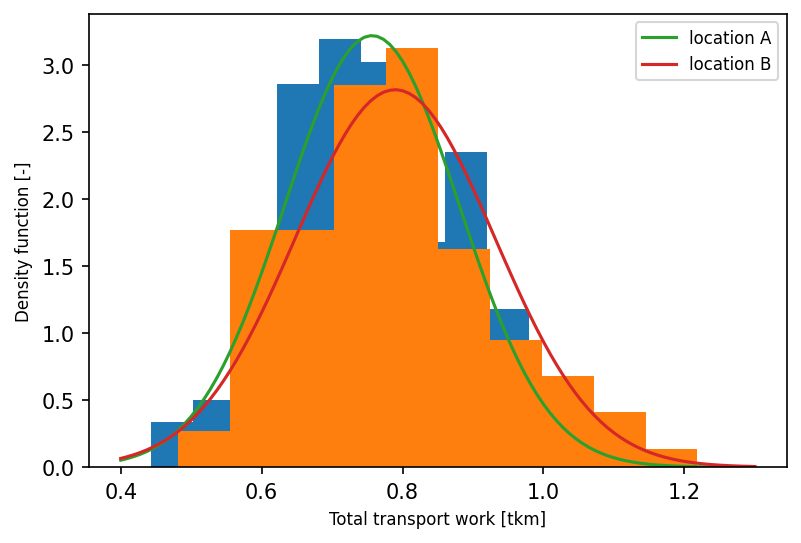

In [3]:
files = {'A': 'tw_d_100_05.txt', 'B': 'tw_m_100_05.txt'}
tws = [[] for _ in files]
fsize = 8
alpha = 0.05

# print files
# print files.keys()

for i in range(len(files)):
    f = open(files[list(files.keys())[i]], "r")
    for d in f:
        tws[i].append(float(d))
    f.close()

tws = np.array(tws)
# print tws

print("{:>10}\t{:>10}\t{:>10}\t{:>10}".format("Location", "Mean", "Variance", "Obs."))
for i in range(len(tws)):
    print("{:>10}\t{:10.3f}\t{:10.4f}\t{:10d}".format(list(files.keys())[i],
        tws[i].mean(), tws[i].var(),
        int(np.round(stats.norm.ppf(1 - alpha)**2 * tws[i].var() / (alpha * tws[i].mean())**2))))
print(min([tw.mean() for tw in tws]) / max([tw.mean() for tw in tws]))

#
plt.figure(dpi=150)

for i in range(len(tws)):
    plt.hist(tws[i], density=True)

xt = plt.xticks()[0]
xmin, xmax = min(xt), max(xt)
lnspc = np.linspace(xmin, xmax, len(tws[0]))

m, s = [0 for _ in files], [0 for _ in files]

for i in range(len(tws)):
    m[i], s[i] = stats.norm.fit(tws[i])
    plt.plot(lnspc, stats.norm.pdf(lnspc, m[i], s[i]), label='location ' + list(files.keys())[i])

plt.legend(fontsize=fsize)
plt.xlabel('Total transport work [tkm]', fontsize=fsize)
plt.ylabel('Density function [-]', fontsize=fsize)

plt.show()

In [20]:
sum(np.array(sorted(tws[0], reverse=True)) > np.array(sorted(tws[1], reverse=False)))

46

In [21]:
np.array(sorted(tws[0], reverse=True)) 

array([1.03918135, 1.0158131 , 1.00904517, 0.97045421, 0.96965472,
       0.95667974, 0.94883723, 0.9369246 , 0.93307811, 0.92207241,
       0.91265852, 0.90995726, 0.90843117, 0.90190821, 0.89809291,
       0.89638134, 0.89289516, 0.88756865, 0.87723218, 0.87512457,
       0.87409127, 0.87175676, 0.86923849, 0.86065594, 0.85789833,
       0.85216718, 0.85010588, 0.84379785, 0.82923695, 0.82764963,
       0.81018756, 0.80804824, 0.8055678 , 0.80348294, 0.7980692 ,
       0.79783907, 0.79563568, 0.79374105, 0.78831138, 0.7878125 ,
       0.78402497, 0.78074811, 0.77602396, 0.77420617, 0.77366687,
       0.77271012, 0.76736412, 0.75942677, 0.75479808, 0.75333967,
       0.74457786, 0.7437362 , 0.73910193, 0.73661585, 0.73460871,
       0.73436273, 0.7292389 , 0.72457257, 0.72057431, 0.71898612,
       0.71889388, 0.71888734, 0.71628374, 0.71166022, 0.70957248,
       0.70810082, 0.70263818, 0.69692106, 0.69166455, 0.68528104,
       0.68426337, 0.67821486, 0.67302442, 0.66692121, 0.66617

In [22]:
np.array(sorted(tws[1], reverse=False))

array([0.48154632, 0.52242612, 0.55970853, 0.5740723 , 0.57560346,
       0.60152697, 0.60328684, 0.60460998, 0.6101474 , 0.61473842,
       0.61515541, 0.61824718, 0.62171062, 0.623662  , 0.62519449,
       0.63199179, 0.65144001, 0.65806349, 0.65848014, 0.66106884,
       0.66281162, 0.66919257, 0.68968371, 0.69698714, 0.69858271,
       0.70005201, 0.70010089, 0.70178288, 0.71403399, 0.71447163,
       0.71929722, 0.71999974, 0.72426617, 0.72570358, 0.72638483,
       0.72758127, 0.72924418, 0.72975631, 0.73006847, 0.73044942,
       0.73746701, 0.75733453, 0.76336668, 0.76443142, 0.76471787,
       0.76885913, 0.77133431, 0.77527014, 0.77608663, 0.77948146,
       0.77973861, 0.78207159, 0.78235482, 0.78343138, 0.78501212,
       0.78899425, 0.80486045, 0.80678007, 0.80967461, 0.81146711,
       0.82025232, 0.82097442, 0.82299845, 0.82477988, 0.82485093,
       0.82921458, 0.82968075, 0.83029173, 0.83272058, 0.83395696,
       0.84413304, 0.84646216, 0.8503946 , 0.85664366, 0.86452

  Location	      Mean	  Variance	      Obs.
         A	     5.828	    0.3235	        10
         B	     3.521	    0.1239	        11
         C	     2.999	    0.0739	         9
         D	     3.130	    0.0710	         8
         E	     2.992	    0.0843	        10
0.5133636493131949


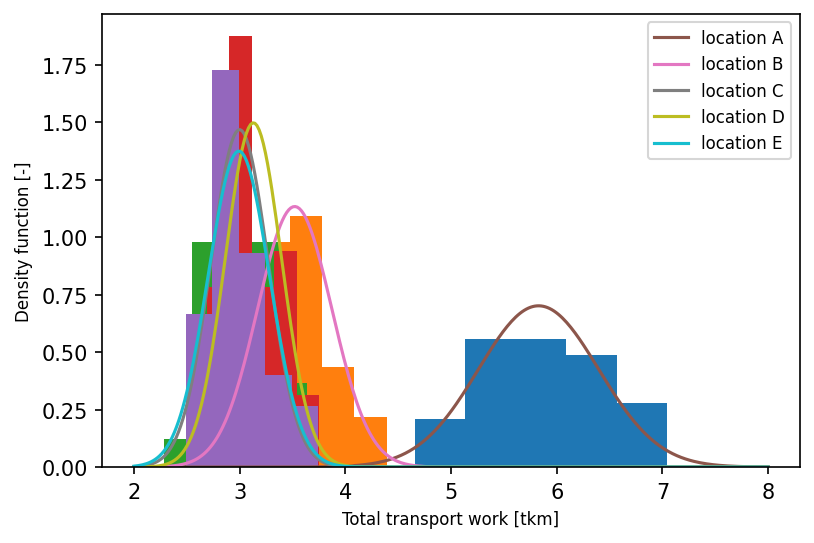

In [28]:
files = {'A': 'A.txt', 'B': 'B.txt', 'C': 'C.txt', 
         'D': 'D.txt', 'E': 'E.txt'}
tws = [[] for _ in files]
fsize = 8
alpha = 0.05

# print files
# print files.keys()

for i in range(len(files)):
    f = open(files[list(files.keys())[i]], "r")
    for d in f:
        tws[i].append(float(d))
    f.close()

tws = np.array(tws)
# print tws

print("{:>10}\t{:>10}\t{:>10}\t{:>10}".format("Location", "Mean", "Variance", "Obs."))
for i in range(len(tws)):
    print("{:>10}\t{:10.3f}\t{:10.4f}\t{:10d}".format(list(files.keys())[i],
        tws[i].mean(), tws[i].var(),
        int(np.round(stats.norm.ppf(1 - alpha)**2 * tws[i].var() / (alpha * tws[i].mean())**2))))
print(min([tw.mean() for tw in tws]) / max([tw.mean() for tw in tws]))

#
plt.figure(dpi=150)

for i in range(len(tws)):
    plt.hist(tws[i], density=True, bins=int(1 + np.log(len(tws[i])) / np.log(2)))

xt = plt.xticks()[0]
xmin, xmax = min(xt), max(xt)
lnspc = np.linspace(xmin, xmax, 300)

m, s = [0 for _ in files], [0 for _ in files]

for i in range(len(tws)):
    m[i], s[i] = stats.norm.fit(tws[i])
    plt.plot(lnspc, stats.norm.pdf(lnspc, m[i], s[i]), label='location ' + list(files.keys())[i])

plt.legend(fontsize=fsize)
plt.xlabel('Total transport work [tkm]', fontsize=fsize)
plt.ylabel('Density function [-]', fontsize=fsize)

plt.show()

In [24]:
np.log(len(tws[i])) / np.log(2)

4.906890595608519

In [23]:
len(tws[i])

30